In [6]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

Using TensorFlow backend.


In [7]:
batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# EDA

In [8]:
print('Training data shape : ',x_train.shape, y_train.shape)
print('Testing data shape : ',x_test.shape, y_test.shape)
print('-'*55)

#find the unique number fromm the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs:' , nClasses)
print('Output Classes         :' , classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
-------------------------------------------------------
Total number of outputs: 10
Output Classes         : [0 1 2 3 4 5 6 7 8 9]


<function matplotlib.pyplot.show(*args, **kw)>

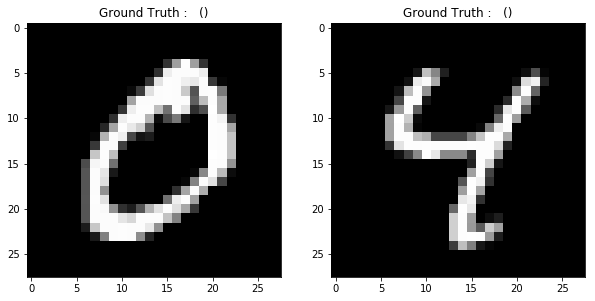

In [9]:
plt.figure(figsize=[10,5])
                   
#Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[1,:,:], cmap='gray')
plt.title("Ground Truth :   ()" .format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[6,:,:], cmap='gray')
plt.title("Ground Truth :   ()" .format(y_test[0]))
plt.show

In [10]:

# Change from matrix to array of dimension 28x28 to array of dimention 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [11]:
# Change to float datatype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Scale the data to lie between 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [12]:
print('Original label 0 : ', y_train[0])

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Display the change for category label using one-hot encoding
print('After conversion to categorical ( one-hot ) : ', y_train[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 264us/step - loss: 0.2571 - acc: 0.9210 - val_loss: 0.1349 - val_acc: 0.9595
Epoch 2/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.1070 - acc: 0.9680 - val_loss: 0.0880 - val_acc: 0.9731
Epoch 3/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.0808 - acc: 0.9749 - val_loss: 0.0937 - val_acc: 0.9723
Epoch 4/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0656 - acc: 0.9803 - val_loss: 0.0748 - val_acc: 0.9794
Epoch 5/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.0562 - acc: 0.9837 - val_loss: 0.0913 - val_acc: 0.9768
Epoch 6/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0505 - acc: 0.9846 - val_loss: 0.0845 - val_acc: 0.9798
Epoch 7/20
60000/60000 [==============================] - 12s 207us/

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11181322426322304
Test accuracy: 0.9841


Text(0.5, 1.0, 'Accuracy Curves')

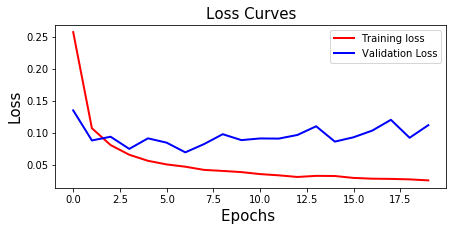

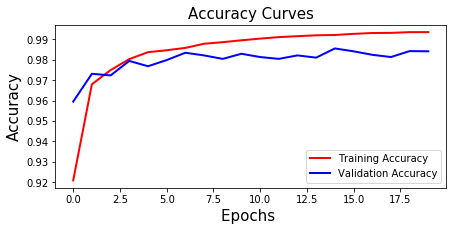

In [17]:
#Plot the Loss Curves
plt.figure(figsize=[7,3])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=10)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title('Loss Curves',fontsize=15)

#Plot the Accuracy Curves
plt.figure(figsize=[7,3])
plt.plot(history.history['acc'],'r',linewidth=2.0)
plt.plot(history.history['val_acc'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=10)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Accuracy Curves',fontsize=15)

In [18]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(784,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

model_reg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(x_train, y_train, 
                            batch_size=256, epochs=20, verbose=1, 
                            validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.3867 - acc: 0.8798 - val_loss: 0.1794 - val_acc: 0.9427
Epoch 2/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1794 - acc: 0.9455 - val_loss: 0.1307 - val_acc: 0.9598
Epoch 3/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.1306 - acc: 0.9602 - val_loss: 0.0965 - val_acc: 0.9711
Epoch 4/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1153 - acc: 0.9658 - val_loss: 0.1058 - val_acc: 0.9686
Epoch 5/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.1000 - acc: 0.9700 - val_loss: 0.0768 - val_acc: 0.9798
Epoch 6/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0919 - acc: 0.9727 - val_loss: 0.0821 - val_acc: 0.9748
Epoch 7/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.0830 - acc: 0.9754 - val_loss: 0.0727 -

Text(0.5, 1.0, 'Accuracy Curves')

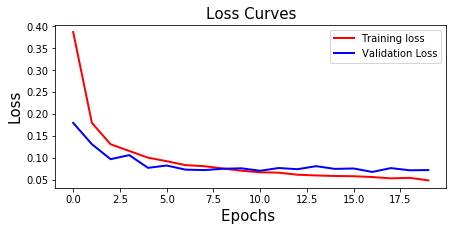

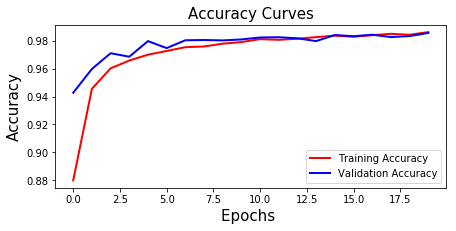

In [20]:
#Plot the Loss Curves
plt.figure(figsize=[7,3])
plt.plot(history_reg.history['loss'],'r',linewidth=2.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=10)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title('Loss Curves',fontsize=15)
 
#Plot the Accuracy Curves
plt.figure(figsize=[7,3])
plt.plot(history_reg.history['acc'],'r',linewidth=2.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=10)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Accuracy Curves',fontsize=15)

In [21]:
# Predict the most likely class
model_reg.predict_classes(x_test[[0],:])

array([7], dtype=int64)

In [22]:
# Predict the probabilities for each class 
model_reg.predict(x_test[[0],:])

array([[1.4264934e-18, 5.6824068e-12, 1.6027706e-10, 3.2110668e-11,
        9.6351462e-18, 9.7340959e-15, 3.1028749e-28, 1.0000000e+00,
        1.0189922e-15, 7.0725072e-11]], dtype=float32)

In [23]:
from keras.models import load_model

model_reg.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model_1 = load_model('my_model.h5')